In [1]:
!pip install gensim

In [0]:
import pandas as pd
import numpy as np
from gensim import corpora


train = pd.read_csv('train.csv', header=None)
test = pd.read_csv('test.csv', header=None)

train_data = train[list(range(50))].as_matrix()
test_data = test[list(range(50))].as_matrix()
train_labels = train[50].as_matrix()
test_labels = test[50].as_matrix()


In [3]:

print(train_data[10], train_labels[10])
print(train_data[13], train_labels[13])


[61123    11  1486 43455    16     0 34829    14   456    15  1005    48
 19423    99     1   212 43455    14    16 23606    48 56439     4     8
 49144    43  8630  4910  4819     8     1    36   274    15   456    16
  7073    67   194     8  2166    25    14  2185    11  4988     8 61955
    48 28062] 4
[   11  1486    15   590    63    62   504   582    12   125     1 73113
     3    73    12  4825    10  5540   918    14    63 34776    15 31294
    16  2063   119 27592    24   118  4834     8     1  5987 19988 51860
    14 29973    10  1486  5669    15   129    48 57371   211 45901     8
     1 43455] 4


In [0]:
dictionary = corpora.Dictionary.load_from_text('bungo_dict.txt').token2id

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
from keras.layers import LSTM

Using TensorFlow backend.


In [6]:
model = Sequential()
model.add(Embedding(110000, 512, input_length=50))
model.add(LSTM(32))
model.add(Dense(9, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 512)           56320000  
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                69760     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 297       
Total params: 56,390,057
Trainable params: 56,390,057
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

x_train = train_data
x_test = test_data

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train, epochs=8, batch_size=512, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/8
50000/50000 [==============================] - 22s 433us/step - loss: 1.5461 - acc: 0.4758 - val_loss: 1.1663 - val_acc: 0.6356
Epoch 2/8
50000/50000 [==============================] - 19s 376us/step - loss: 0.8795 - acc: 0.7374 - val_loss: 0.8599 - val_acc: 0.7444
Epoch 3/8
50000/50000 [==============================] - 19s 375us/step - loss: 0.5557 - acc: 0.8307 - val_loss: 0.6319 - val_acc: 0.8133
Epoch 4/8
50000/50000 [==============================] - 18s 367us/step - loss: 0.3533 - acc: 0.8941 - val_loss: 0.5194 - val_acc: 0.8465
Epoch 5/8
50000/50000 [==============================] - 18s 364us/step - loss: 0.2103 - acc: 0.9426 - val_loss: 0.4575 - val_acc: 0.8657
Epoch 6/8
50000/50000 [==============================] - 18s 365us/step - loss: 0.1182 - acc: 0.9707 - val_loss: 0.4628 - val_acc: 0.8691
Epoch 7/8
50000/50000 [==============================] - 18s 366us/step - loss: 0.0701 - acc: 0.9831 - val_loss: 0.4705 - 

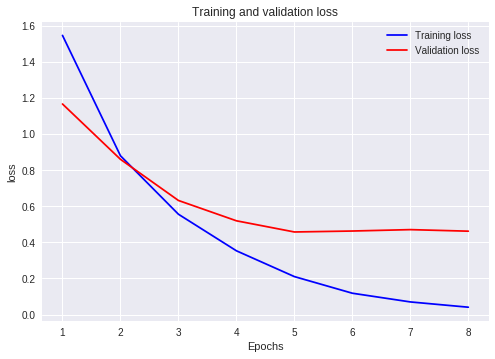

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

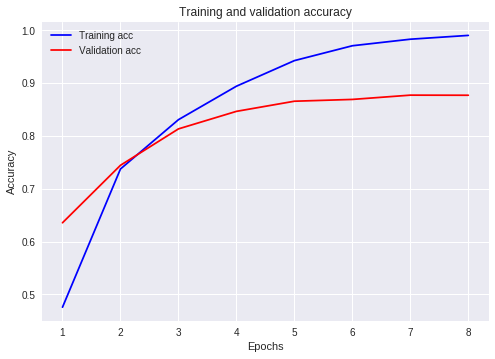

In [11]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model.save('pre_trained_model.h5')

In [13]:
results = model.evaluate(x_test, one_hot_test_labels)

10000/10000 [==============================] - 11s 1ms/step


In [14]:
results

[0.47001368153095247, 0.8787]

In [0]:
#predictions = model.predict(x_test)

In [0]:
#predictions